In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from scipy.optimize import curve_fit
import scipy.io
from PIL import Image
from pylab import *

In [2]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True)

# restore np.load for future normal usage
# np.load = np_load_old

In [3]:
v_distances = np.asarray([13.2, 23.1, 33, 42.9, 52.8])
mydistances = np.linspace(v_distances[0], v_distances[-1], 7)
mydistances_exp = np.linspace(v_distances[0], v_distances[-1], 30)

nonsocialhc = np.load("Results/nonsocialhc.npy")
socialhc = np.load("Results/socialhc.npy")
nonsocialasd = np.load("Results/nonsocialasd.npy")
socialhc_alter = np.load("Results/socialhc_alter.npy")

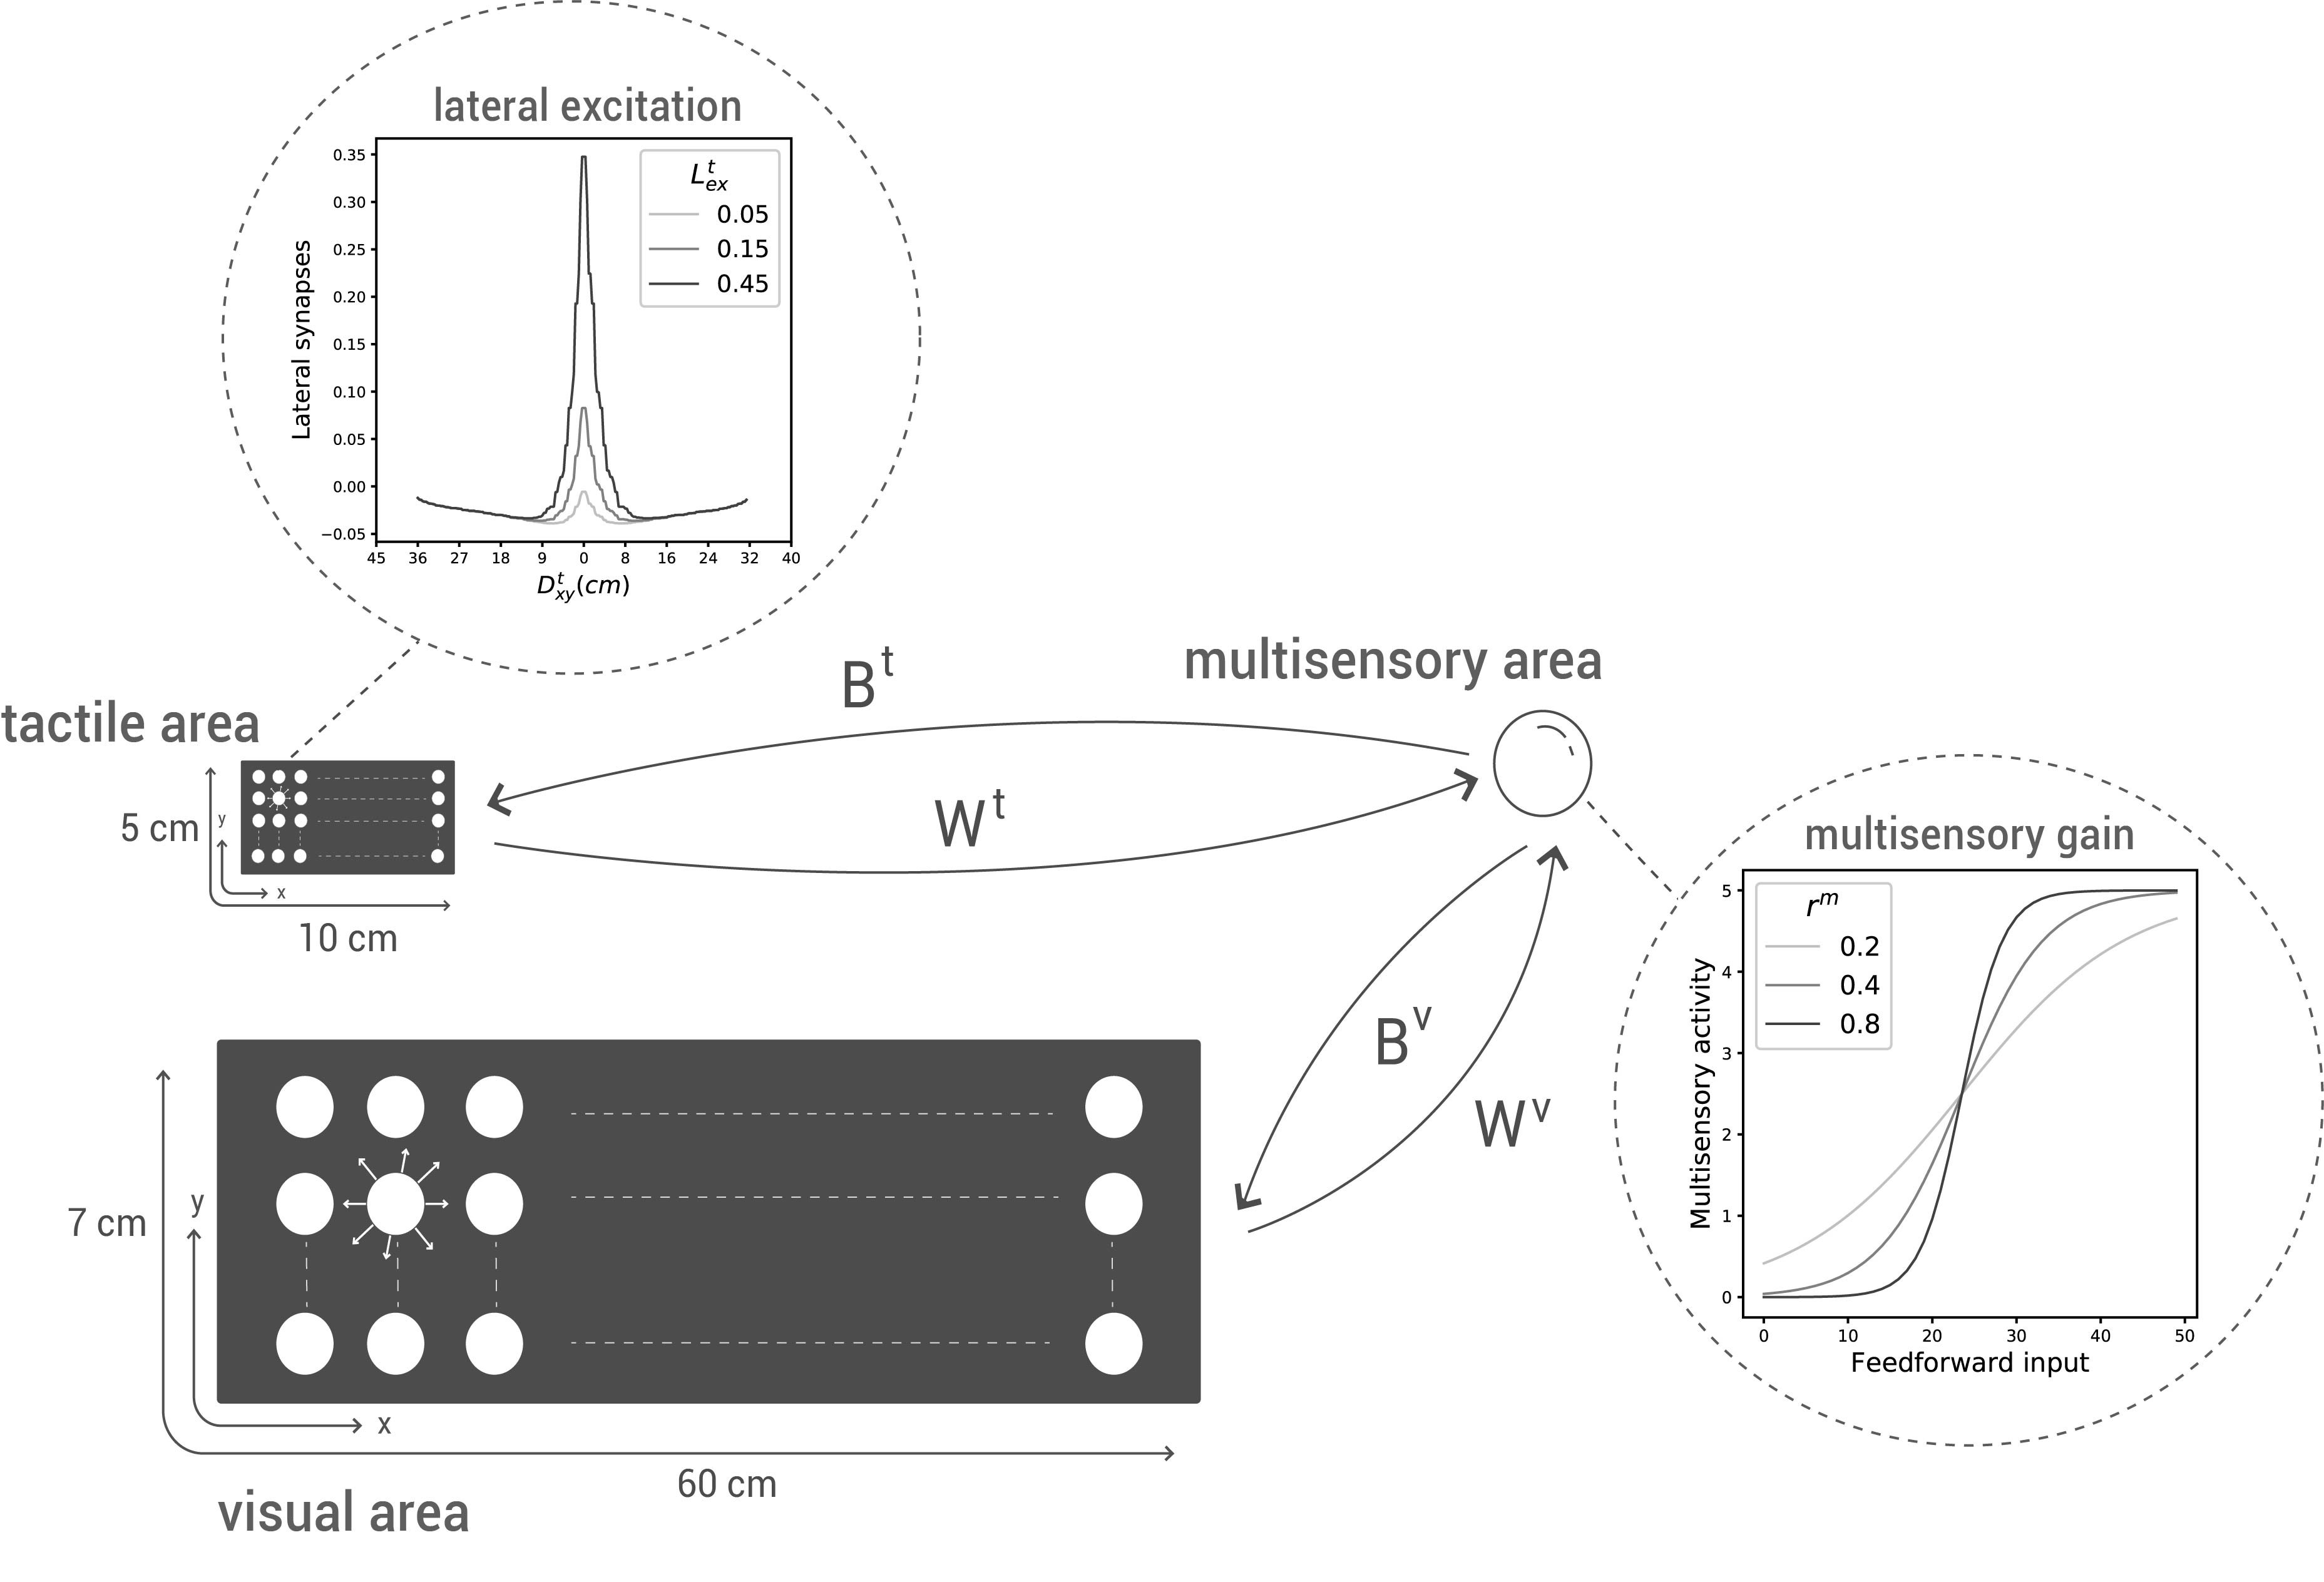

In [5]:
img = Image.open("./PPS_ASD_Cartoon.jpg")
img

In [4]:
rts11 = np.load("Results/gainlexinteraction.npy")
mydistances_inter = np.linspace(v_distances[0], v_distances[-1], 20, endpoint=True)
sizeg = 9
mygrange = np.linspace(0.1, 1, sizeg, endpoint=True)
mylexrange = np.asarray([0.15, 0.63258857])

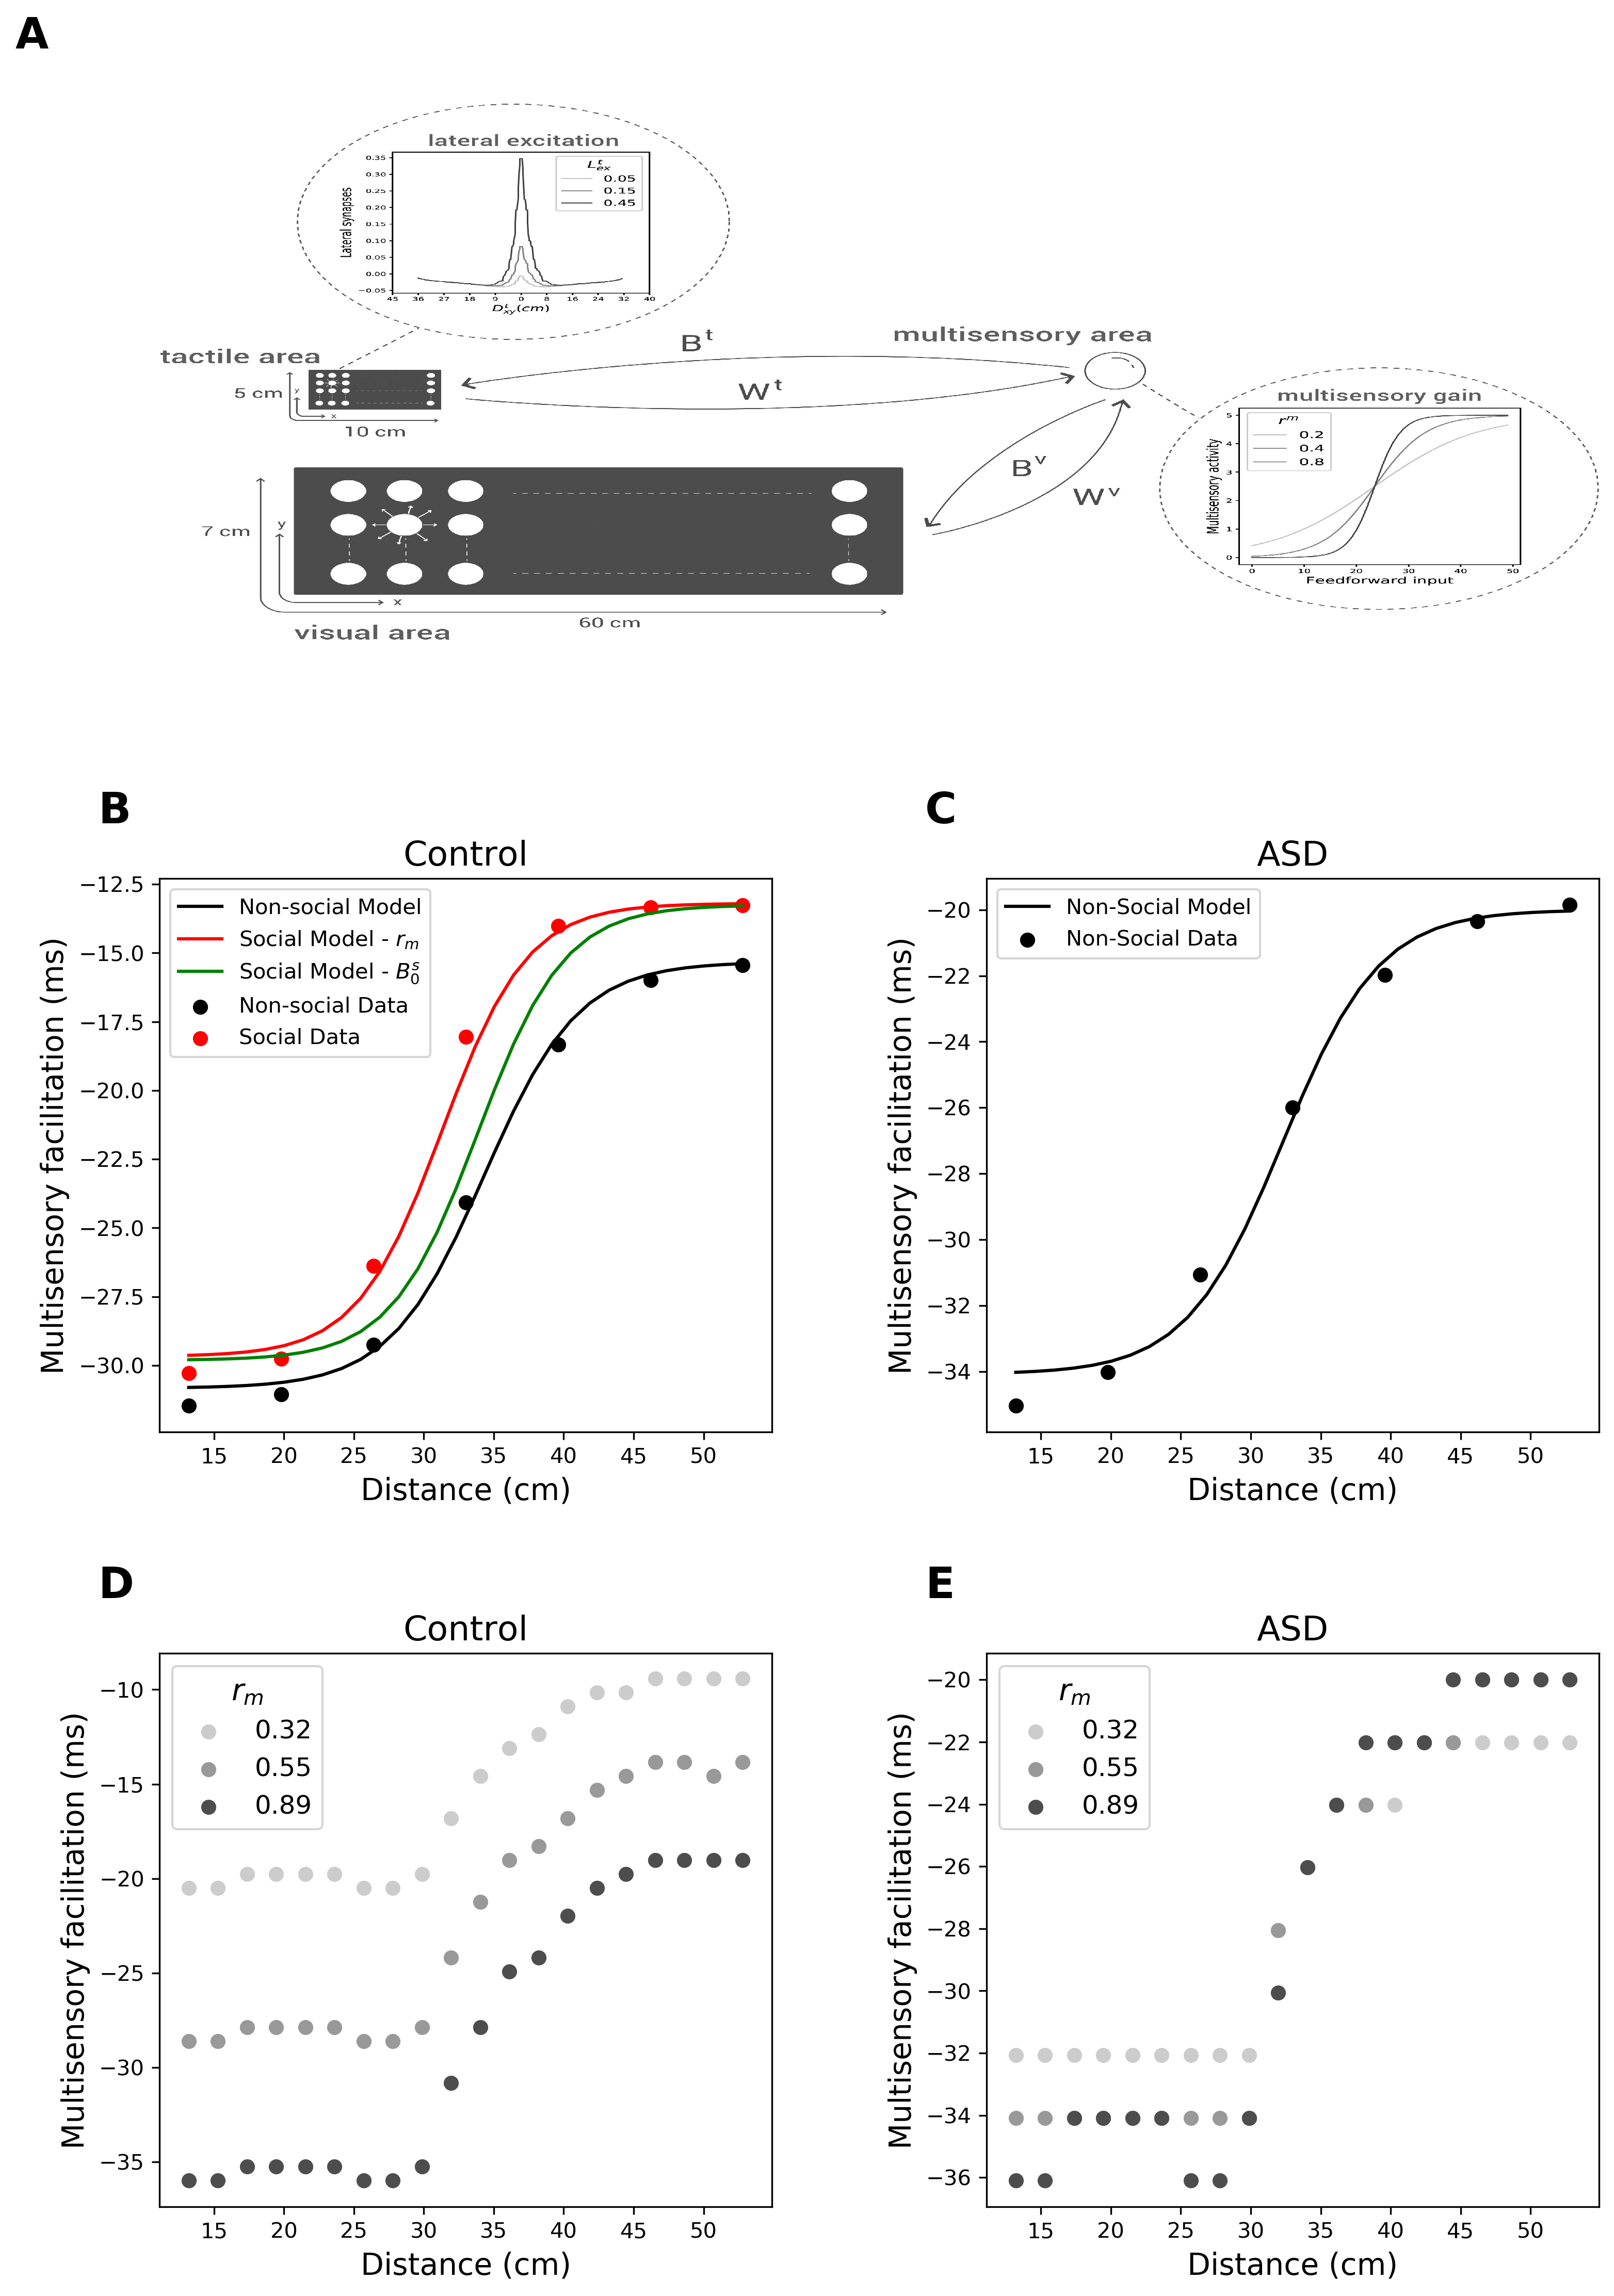

In [6]:
fig = plt.figure(figsize=(12, 18), dpi=300)
gs = fig.add_gridspec(3, 2)
ax3 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[2, 0])

# ax3 = plt.subplot(311)
ax3.imshow(img, aspect="auto")
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax3.transAxes,
    size=20,
    weight="bold",
)

# ax1 = plt.subplot(323)
ax1.plot(mydistances_exp, nonsocialhc[0], label="Non-social Model", color="k")
ax1.scatter(mydistances, nonsocialhc[1], label="Non-social Data", color="k")
ax1.plot(mydistances_exp, socialhc[0], label="Social Model - $r_m$", color="r")
ax1.plot(
    mydistances_exp, socialhc_alter[0], label="Social Model - $B_{0}^{s}$", color="g"
)
ax1.scatter(mydistances, socialhc[1], label="Social Data", color="r")
ax1.set_title("Control", size=16)
ax1.set_ylabel("Multisensory facilitation (ms)", size=14)
ax1.set_xlabel("Distance (cm)", size=14)
ax1.legend(prop={"size": 10})
ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

# ax2 = plt.subplot(324)
ax2.plot(mydistances_exp, nonsocialasd[0], label="Non-Social Model", color="k")
ax2.scatter(mydistances, nonsocialasd[1], label="Non-Social Data", color="k")
ax2.set_title("ASD", size=16)
ax2.set_ylabel("Multisensory facilitation (ms)", size=14)
ax2.set_xlabel("Distance (cm)", size=14)
ax2.legend(prop={"size": 10})
ax2.text(
    -0.1,
    1.1,
    string.ascii_uppercase[2],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

idx = [2, 4, 7]

for i in idx:
    ax5.scatter(
        mydistances_inter,
        1.8458906909030797 * rts11[i, :, 0] - 2.0352045221870987,
        label=np.round(mygrange[i], 2),
        color=str(1 - i / 10),
    )
ax5.set_xlabel("Distance (cm)", size=14)
ax5.set_ylabel("Multisensory facilitation (ms)", size=14)
ax5.set_title("Control", size=16)
ax5.legend(title="$r_m$", fontsize=12, title_fontsize=14)
ax5.text(
    -0.1,
    1.1,
    string.ascii_uppercase[3],
    transform=ax5.transAxes,
    size=20,
    weight="bold",
)

for i in idx:
    ax4.scatter(
        mydistances_inter,
        5.029315308541629 * rts11[i, :, 1] - 15.977252740525818,
        label=np.round(mygrange[i], 2),
        color=str(1 - i / 10),
    )
ax4.set_xlabel("Distance (cm)", size=14)
ax4.set_ylabel("Multisensory facilitation (ms)", size=14)
ax4.set_title("ASD", size=16)
ax4.legend(title="$r_m$", fontsize=12, title_fontsize=14)
ax4.text(
    -0.1,
    1.1,
    string.ascii_uppercase[4],
    transform=ax4.transAxes,
    size=20,
    weight="bold",
)

fig.subplots_adjust(wspace=0.35, hspace=0.4)

# Appendix

In [11]:
asd_ns_exploration = np.load("Results/asd_ns_exploration.npy")

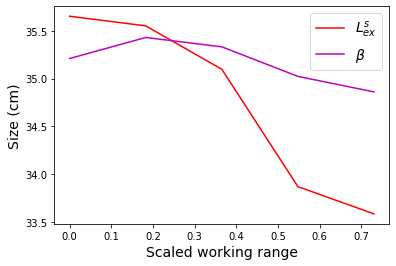

In [15]:
plt.plot(asd_ns_exploration[0], asd_ns_exploration[1], label="$L_{ex}^{s}$", color="r")
plt.plot(asd_ns_exploration[2], asd_ns_exploration[3], label=r"$\beta$", color="m")
plt.ylabel("Size (cm)", size=14)
plt.xlabel("Scaled working range", size=14)
plt.legend(fontsize=14)
plt.savefig("Results/asd_ns_alterfitting.png", bbox_inches="tight")